In [95]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [96]:
# read first n rows and columns
filename = 'GarmonData.csv'

df = pd.read_csv(filename, skiprows=0, usecols = ['DATEUTC','ID','LAT','LON','TEMPC','SOLARRADIATION','UV','WINDSPEEDKMH','WINDDIR','RAININ'])

In [97]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise Exception("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise Exception("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise Exception("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [98]:
# num_smooth = 2
# for j in range(num_smooth):
#     for i in range(df[quantity].shape[0]):
#         df[quantity][i] = smooth(df[quantity][i])

In [99]:
quantity = 'TEMPC'

In [100]:
print(df)

df_median = df[['DATEUTC', quantity]].copy()
# df_day['DATEUTC'] = df_day['DATEUTC'].str.slice(start=0, stop=11)

print(df_median)
# df_day = df_day.groupby('DATEUTC').agg({quantity:median})
# df_day['RAININ_TOT'] = df_day.groupby(['DATEUTC'])['RAININ'].transform('sum')
# df_median = df_median.groupby([df_median['DATEUTC'], df_median[quantity]]).median()

df_median = df_median.groupby('DATEUTC', as_index=False)[quantity].median()

print(df_median)


                     DATEUTC         ID        LAT       LON  TEMPC  WINDDIR  \
0        2019-06-20 18:50:00  GARMON002  50.846792  4.755860   19.7      NaN   
1        2019-06-20 18:55:00  GARMON002  50.846792  4.755860   19.4      NaN   
2        2019-06-20 19:00:00  GARMON002  50.846792  4.755860   19.0      NaN   
3        2019-06-20 19:05:00  GARMON002  50.846792  4.755860   18.6      NaN   
4        2019-06-20 19:10:00  GARMON002  50.846792  4.755860   18.2      NaN   
...                      ...        ...        ...       ...    ...      ...   
3549837  2020-02-02 23:35:00  GARMON099  50.881479  4.714405   11.4    196.0   
3549838  2020-02-02 23:40:00  GARMON099  50.881479  4.714405   11.4    206.0   
3549839  2020-02-02 23:45:00  GARMON099  50.881479  4.714405   11.4    190.0   
3549840  2020-02-02 23:50:00  GARMON099  50.881479  4.714405   11.4    191.0   
3549841  2020-02-02 23:55:00  GARMON099  50.881479  4.714405   11.4    193.0   

         WINDSPEEDKMH  RAININ  SOLARRAD

In [101]:
num_smooth = 10
df_smooth = df_median.copy()
for j in range(num_smooth):
    df_smooth[quantity] = smooth(df_smooth[quantity], window_len=200)[0:df_smooth[quantity].shape[0]]

Text(0.5, 0.98, 'TEMPC median of sensors in time')

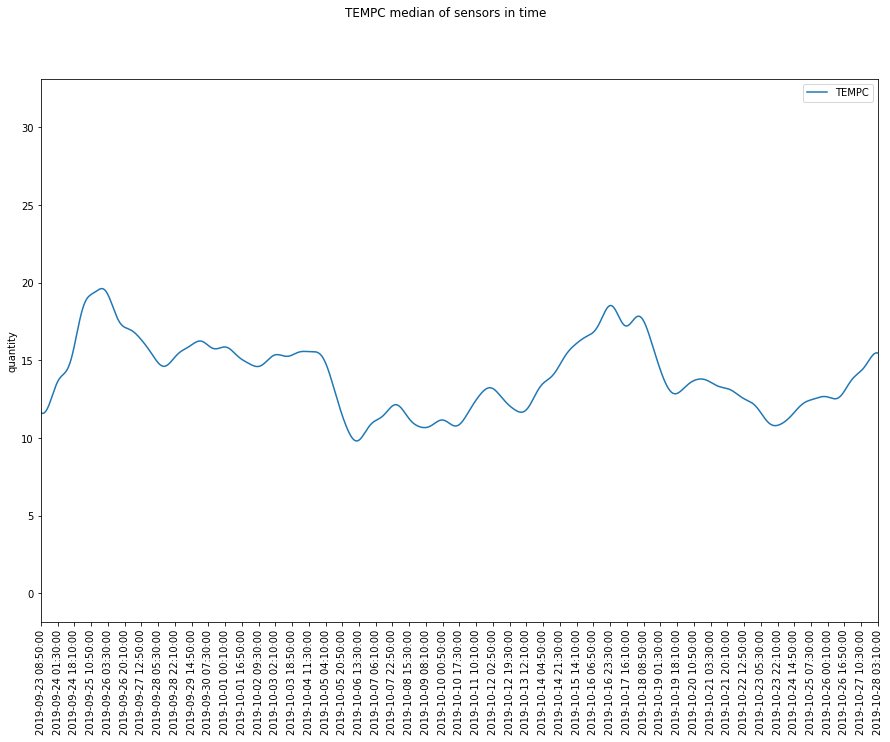

In [109]:
TICK_STEP = 200
T0 = 0
T1 = -1
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,10))
ax.plot(df_smooth[quantity][T0:T1], label=quantity)
ax.legend()
# ax.set_xlabel(date_star)
ax.set_ylabel('quantity')
# start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, df_smooth[T0:T1].shape[0], TICK_STEP))
ax.set_xticklabels(df_smooth['DATEUTC'][T0:T1:TICK_STEP], rotation='vertical')
ax.set_xlim([25000, 35000])
fig.suptitle(quantity+' median of sensors in time')